# Predicting Forest Fires


In this notebook I will explore different machine learning regression algorithms to see how well they can predict forest fire outcomes. In this notebook I will examine the different merits and drawbacks of using multiple linear regression, polynomial regression, SVM regression, and random forest regression.


All X features are scaled and y has been transformed.

# Visualization Strategy

The purpose of this analysis is to grasp an undertanding of the factors that affect forest fires in Montesinho Park. Before I will attempt to model the inputs from the meteorlogical data I will make various visualizations to get a handle on the data 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Import data from flat file

path = 'forestfires.csv'
data = pd.read_csv(path)
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


To-Do: 
    Plot by month
    Plot by day
    Plot by X
    Plot by Y

## Burned Area

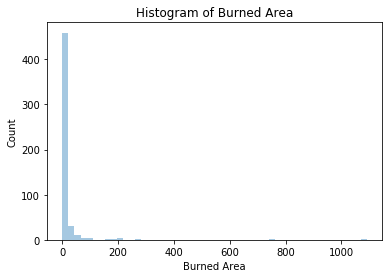

In [24]:
sns.distplot(data['area'], hist=True, kde=False)
plt.title('Histogram of Burned Area')
plt.xlabel('Burned Area')
plt.ylabel('Count')
plt.show()

In [40]:
data['area'].describe()

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64

Histogram is skewed to the right very drastically. I'll transform 'area' to equal ln(1+area) and view the histogram

In [21]:
ln_area = np.log1p(data['area'])

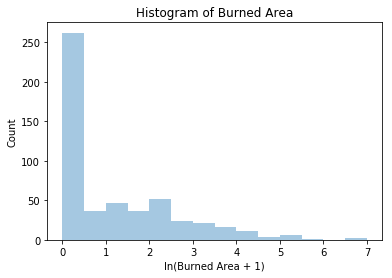

In [23]:
sns.distplot(ln_area, hist=True, kde=False)
plt.title('Histogram of Burned Area')
plt.xlabel('ln(Burned Area + 1)')
plt.ylabel('Count')
plt.show()

Start to get a better look at the data. Next I'll narrow down the chart to areas greater than 0

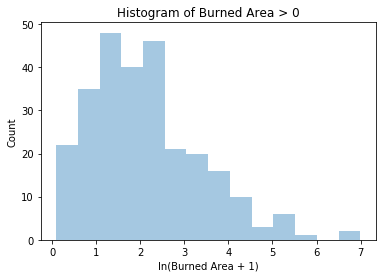

In [36]:
sns.distplot(ln_area[ln_area > 0], hist=True, kde=False, )
plt.title('Histogram of Burned Area > 0')
plt.xlabel('ln(Burned Area + 1)')
plt.ylabel('Count')
plt.show()

Data is starting to take shape, still skewed right, but nearly to the same extent as before

In [41]:
ln_area[ln_area > 0].describe()

count    270.000000
mean       2.127409
std        1.257381
min        0.086178
25%        1.144223
50%        1.997417
75%        2.798648
max        6.995620
Name: area, dtype: float64

## Burned Area by Location

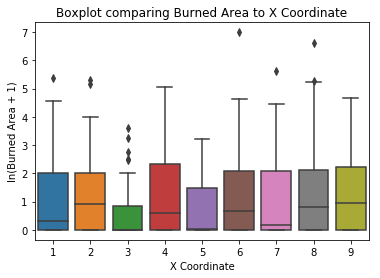

In [47]:
sns.boxplot(x='X', y=ln_area, data=data)
plt.title('Boxplot comparing Burned Area to X Coordinate')
plt.ylabel('ln(Burned Area + 1)')
plt.xlabel('X Coordinate')
plt.show()

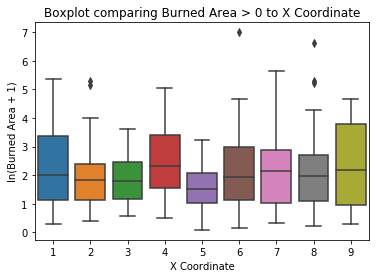

In [49]:
sns.boxplot(x='X', y=ln_area[ln_area > 0], data=data)
plt.title('Boxplot comparing Burned Area > 0 to X Coordinate')
plt.ylabel('ln(Burned Area + 1)')
plt.xlabel('X Coordinate')
plt.show()

Notice a few outliers in the data, but neither chart makes a very compelling case that X coordinate is a very influential factor.

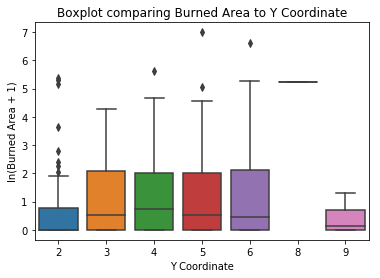

In [50]:
sns.boxplot(x='Y', y=ln_area, data=data)
plt.title('Boxplot comparing Burned Area to Y Coordinate')
plt.ylabel('ln(Burned Area + 1)')
plt.xlabel('Y Coordinate')
plt.show()

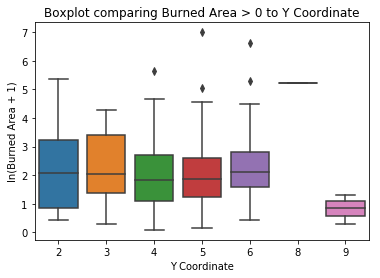

In [61]:
ax = sns.boxplot(x='Y', y=ln_area[ln_area > 0], data=data)
plt.title('Boxplot comparing Burned Area > 0 to Y Coordinate')
plt.ylabel('ln(Burned Area + 1)')
plt.xlabel('Y Coordinate')
plt.show()

Note that there are no entry points for y=1 and 7, and that there is only one entry where y=8

## Burned Area by Day and Month

### Day

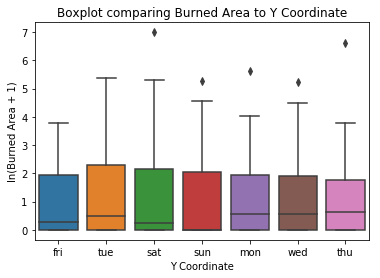

In [62]:
sns.boxplot(x='day', y=ln_area, data=data)
plt.title('Boxplot comparing Burned Area to Y Coordinate')
plt.ylabel('ln(Burned Area + 1)')
plt.xlabel('Y Coordinate')
plt.show()

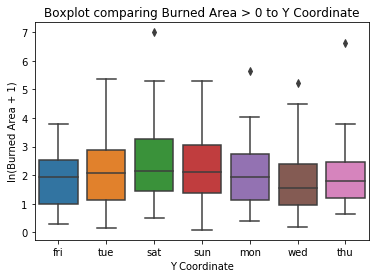

In [63]:
ax = sns.boxplot(x='day', y=ln_area[ln_area > 0], data=data)
plt.title('Boxplot comparing Burned Area > 0 to Y Coordinate')
plt.ylabel('ln(Burned Area + 1)')
plt.xlabel('Y Coordinate')
plt.show()

Does not appear to be statistically significant here

### Month

In [66]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

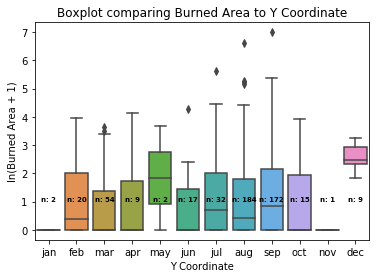

In [118]:
ax = sns.boxplot(x='month', y=ln_area, data=data, order=months)
plt.title('Boxplot comparing Burned Area to Y Coordinate')
plt.ylabel('ln(Burned Area + 1)')
plt.xlabel('Y Coordinate')

# Calculate number of obs per group
# medians = data.groupby(['month'])['area'].median().values
nobs = data.groupby('month')['area'].count()[months].values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], 1, nobs[tick],
    horizontalalignment='center', size='x-small', color='black', weight='semibold')

plt.show()

In [117]:
data.groupby('month')['area'].count()[months].values

array([  2,  20,  54,   9,   2,  17,  32, 184, 172,  15,   1,   9])

In [120]:
data[data['area']>0].groupby('month')['area'].count()[months].values

array([nan, 10., 19.,  4.,  1.,  8., 18., 99., 97.,  5., nan,  9.])

In [122]:
np.nan_to_num(data[data['area']>0].groupby('month')['area'].count()[months].values)

array([ 0., 10., 19.,  4.,  1.,  8., 18., 99., 97.,  5.,  0.,  9.])

/Users/jdkrahulik/anaconda3/envs/conda_root/lib/python3.6/site-packages/pandas/core/series.py:851: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


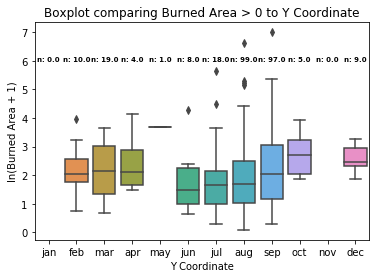

In [135]:
ax = sns.boxplot(x='month', y=ln_area[ln_area > 0], data=data, order=months)
plt.title('Boxplot comparing Burned Area > 0 to Y Coordinate')
plt.ylabel('ln(Burned Area + 1)')
plt.xlabel('Y Coordinate')

# Calculate number of obs per group
# medians = np.log1p(data[data['area']>0].groupby('month')['area'].median())
nobs = data[data['area']>0].groupby('month')['area'].count()[months].values
nobs = np.nan_to_num(nobs)
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], 6, nobs[tick],
    horizontalalignment='center', size='x-small', color='black', weight='semibold')

plt.show()

Notice that counts are not uniformly distributed. This could be helpful information to determine if a fire will occur, but in this case since I am interested in the damage a fire causes there is potential for overfitting.

### Other Factors

How do the columns ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'] correlate to area burned?

In [137]:
factors = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

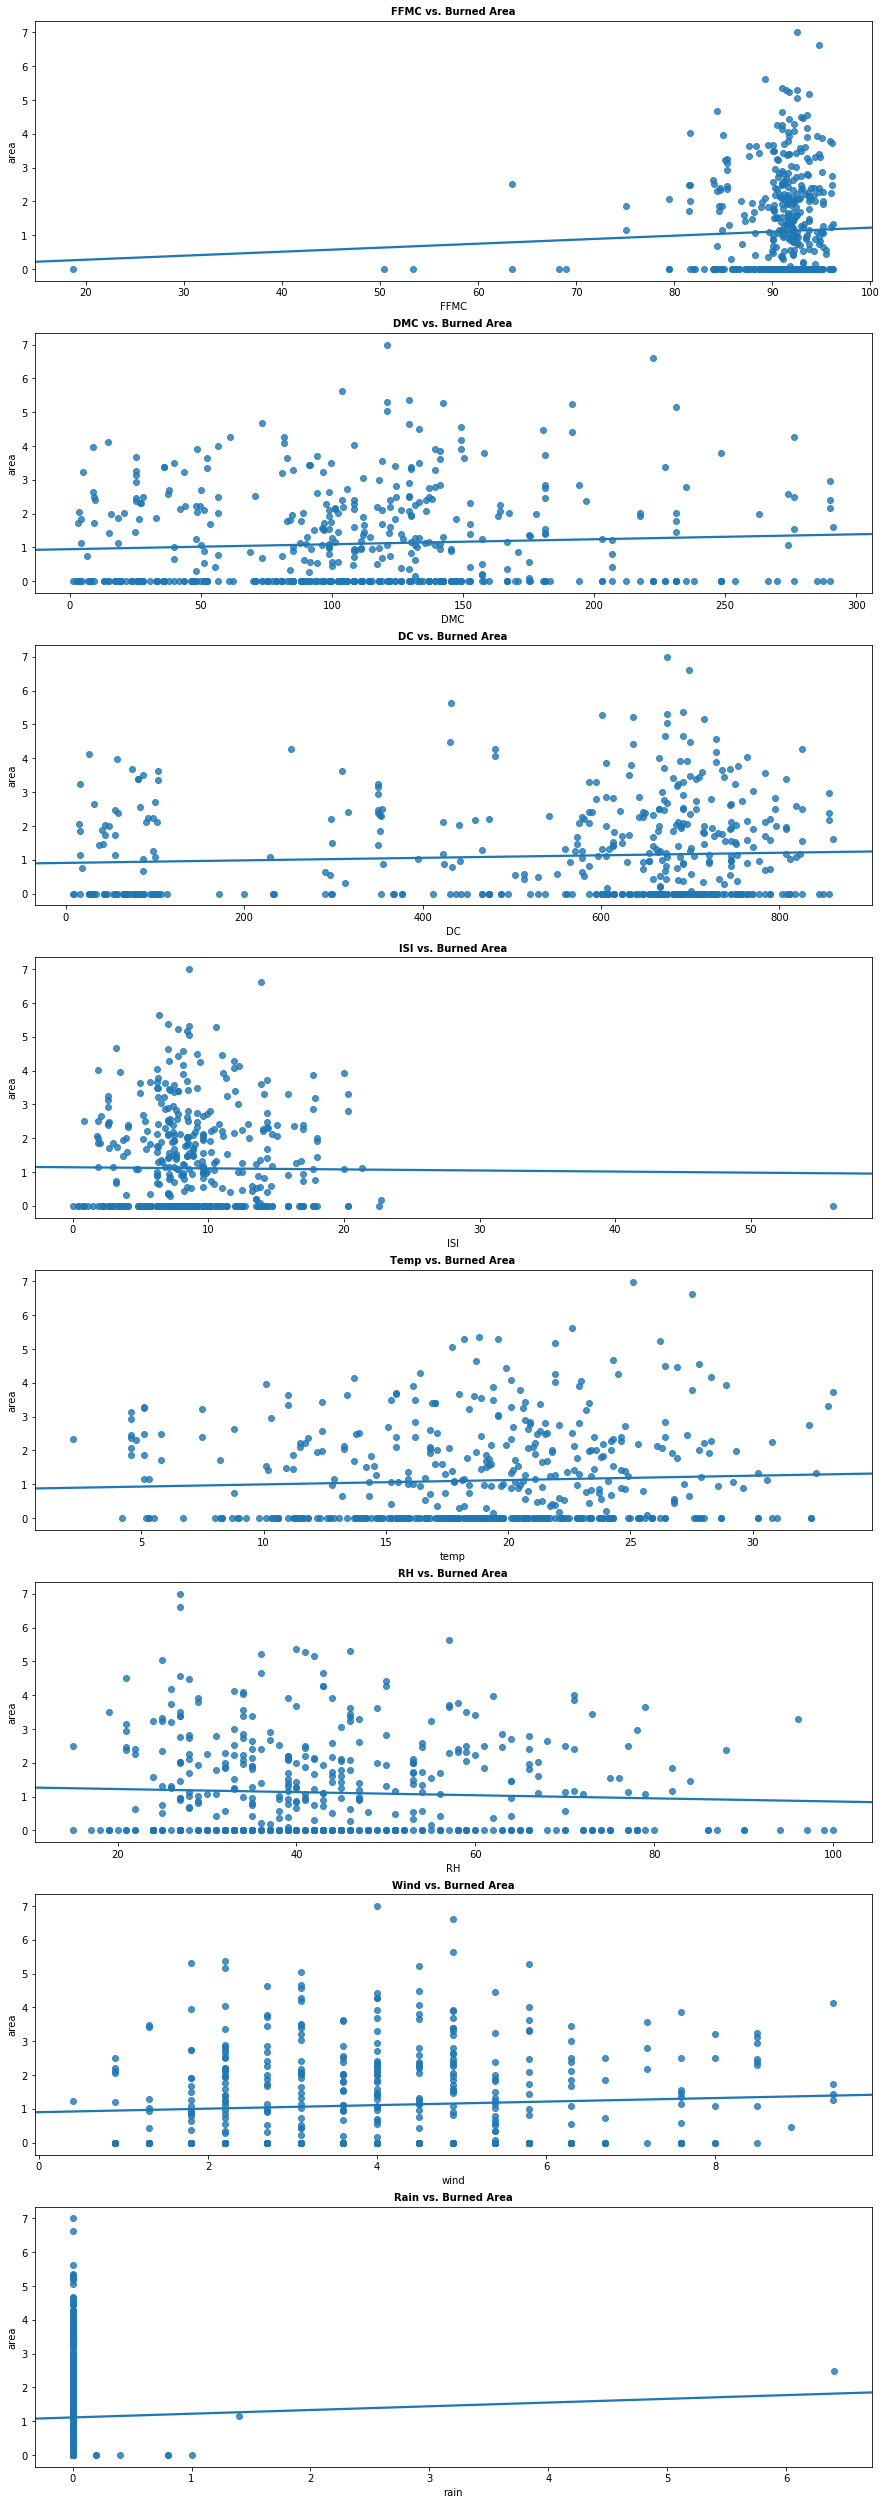

In [165]:
i = 1
plt.figure(figsize=(15,45))
for attr in factors:
    plt.subplot(len(factors), 1, i)
    sns.regplot(data[attr], ln_area, fit_reg=True, ci=None)
    plt.title(str(attr)[0].upper() + str(attr)[1:] +  ' vs. Burned Area', 
              fontdict={'fontweight': 'heavy', 'fontsize': 10})
    i += 1
plt.show()

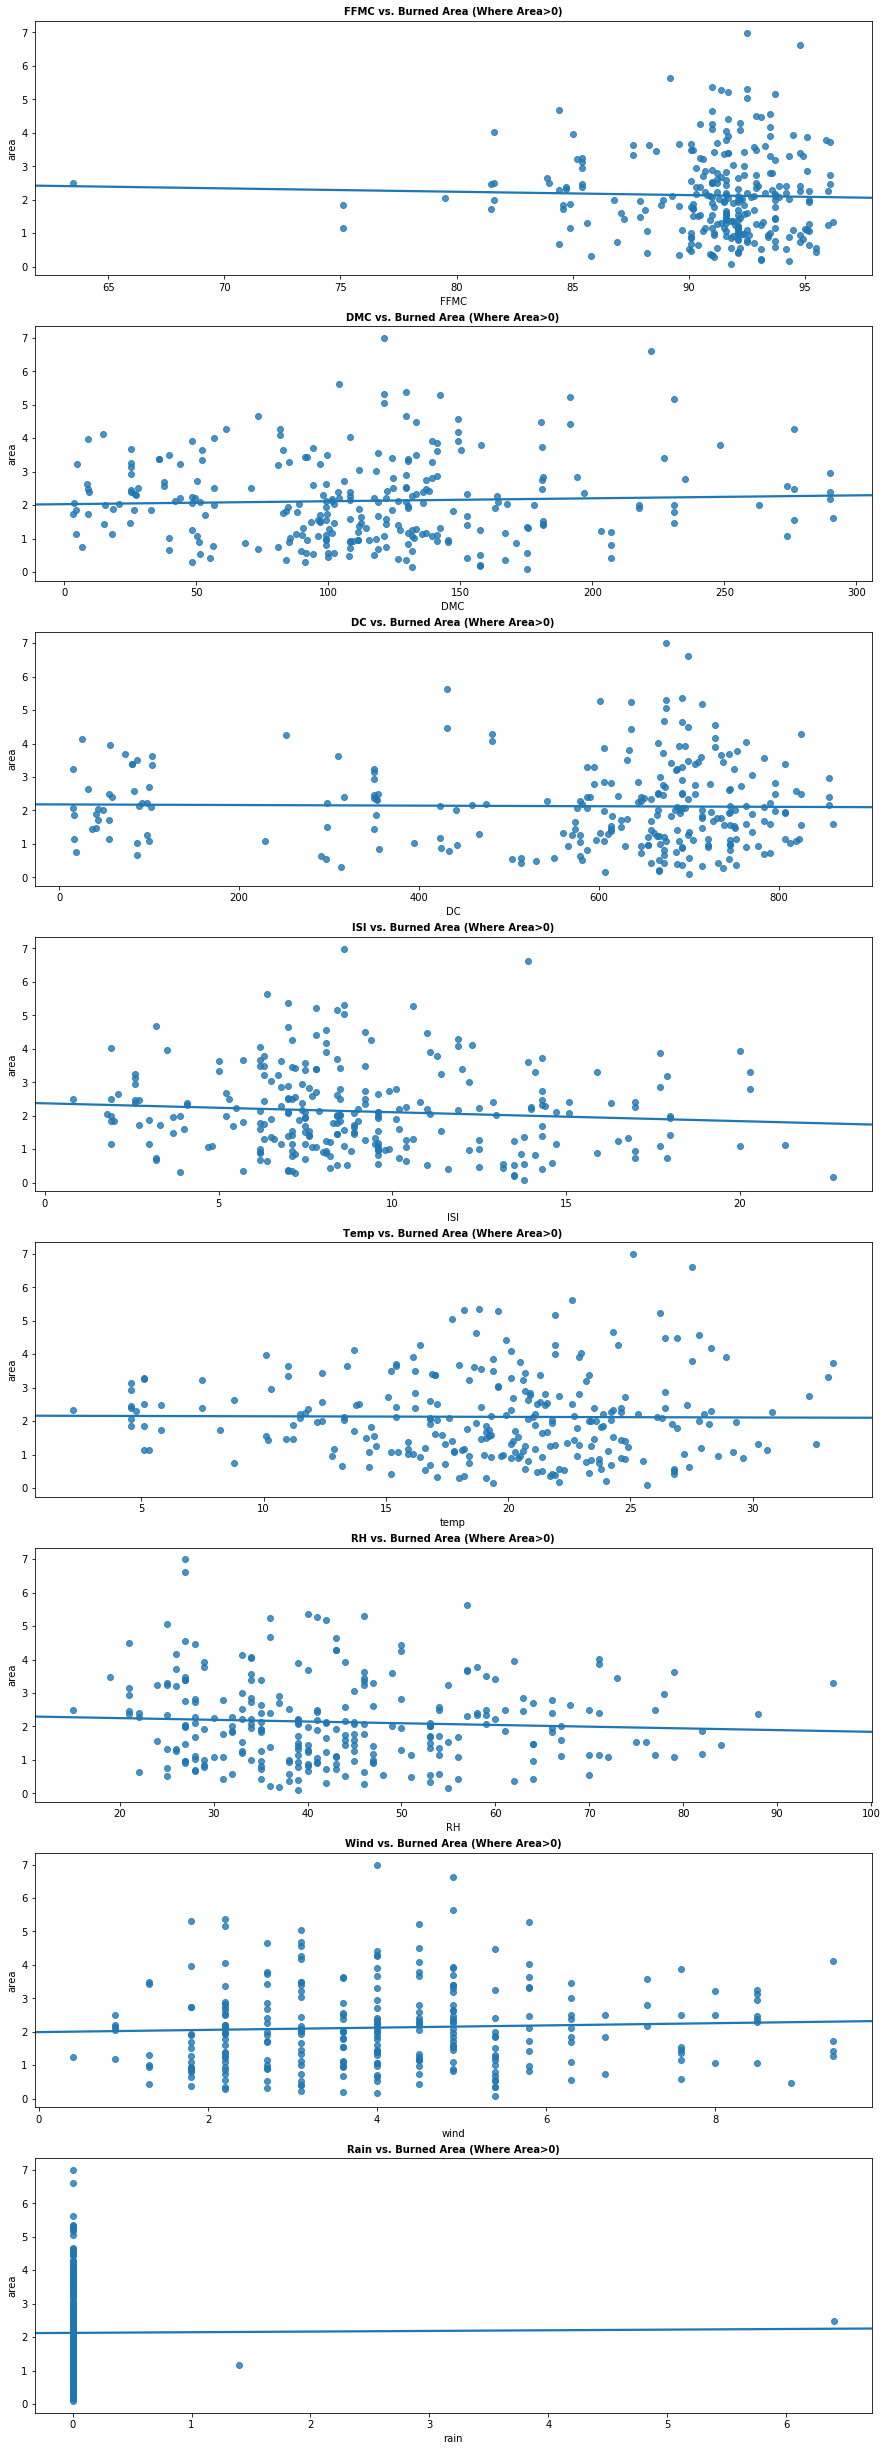

In [166]:
# Repeat with areaburned > 0 

i = 1
plt.figure(figsize=(15,44))
for attr in factors:
    plt.subplot(len(factors), 1, i)
    sns.regplot(data[data['area']>0][attr], ln_area[ln_area>0], fit_reg=True, ci=None)
    plt.title(str(attr)[0].upper() + str(attr)[1:] +  ' vs. Burned Area (Where Area>0)', 
              fontdict={'fontweight': 'heavy', 'fontsize': 10})
    i += 1
plt.show()

# Conclusion

Unfortunately there is no smoking gun!

To-do:
    - Omit 'X', 'Y' coordinate features from data
    - Convert 'month'into quarters due to low counts
    - Model with LinearRegression, RF, and SVR techniques
    
    